# Poverty Graduation Support AI/ML Pipeline (Updated)

This notebook orchestrates the updated AI/ML pipeline based on the new feature engineering plan.

In [1]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.insert(0, 'src')

## 1. Data Loading & Feature Engineering

In [2]:
from src.feature_engineering import run_feature_engineering

raw_data_path = 'data/Participant_Selection_Final.csv'
X_train, X_val, X_test, y1_train, y1_val, y1_test, y2_train, y2_val, y2_test, final_features = \
    run_feature_engineering(raw_data_path)

print(f"Feature Engineering completed. Final features: {len(final_features)}")
# print(final_features) # Uncomment to see feature list

2025-10-30 04:52:15,052 - INFO - Starting Feature Engineering Pipeline...
2025-10-30 04:52:15,052 - INFO - Loading data from data/Participant_Selection_Final.csv (with headers)
2025-10-30 04:52:15,083 - INFO - Initial data shape: (14654, 28)
2025-10-30 04:52:15,084 - INFO - Columns: ['Sl', 'Participant_ID', 'Participant_Birthdate', 'Marrital_Status', 'Family_Migrant_Tenure(Years)', 'Gurdian_Age', 'Family_Size', 'Asset_Yes', 'Productive_Asset_Num', 'Productive_Asset_Value', 'Total_Income_Annualy', 'Income_Monthly_per_head', 'Chronic_Patient_Num', 'Disabled_Num', 'Loans_Num', 'Loans_Outstanding', 'has_Savings', 'Savings_Amt', 'has_18_50_Family_member', 'has_50_plus', 'has_under5', 'Has_Chronic_Dissease', 'Loans_Taken_Yes', 'Loans_Running_Yes', 'Migrant', 'Disabled_Yes', 'Participant_Selected_For_AID', 'Aid_Type_Recomended']
2025-10-30 04:52:15,084 - INFO - Data types:
Sl                                int64
Participant_ID                   object
Participant_Birthdate            object
M

Feature Engineering completed. Final features: 10


In [3]:
# --- CELL TO RE-RUN FEATURE ENGINEERING ---
# This step MUST complete successfully to overwrite the old CSV files
from src.feature_engineering import run_feature_engineering

raw_data_path = 'data/Participant_Selection_Final.csv'

print("Starting Feature Engineering...")
try:
    X_train, X_val, X_test, y1_train, y1_val, y1_test, y2_train, y2_val, y2_test, final_features = \
        run_feature_engineering(raw_data_path) # <-- Correct function name here
    print(f"Feature Engineering completed successfully.")
    print(f"  - Final features: {len(final_features)}")
    print(f"  - X_train shape: {X_train.shape}")
    print(f"  - y1_train shape: {y1_train.shape}")
    print(f"  - X_val shape: {X_val.shape}")
    print(f"  - y1_val shape: {y1_val.shape}")
    print(f"  - X_test shape: {X_test.shape}")
    print(f"  - y1_test shape: {y1_test.shape}")

    # Explicitly check the shape of the saved files after FE completes
    import pandas as pd
    print("\nChecking saved file shapes:")
    X_train_saved = pd.read_csv('data/processed_X_train.csv')
    y1_train_saved = pd.read_csv('data/processed_y1_train.csv', header=None).iloc[:, 0] # Load as Series
    print(f"  - Saved X_train shape: {X_train_saved.shape}")
    print(f"  - Saved y1_train shape: {y1_train_saved.shape}")

    if X_train_saved.shape[0] == y1_train_saved.shape[0]:
        print("SUCCESS: Shapes of saved X_train and y1_train match!")
    else:
        print(f"ERROR: Shapes still mismatch! X: {X_train_saved.shape[0]}, y: {y1_train_saved.shape[0]}")
        # You might want to stop here if shapes mismatch

except Exception as e:
    print(f"Error during Feature Engineering: {e}")
    import traceback
    traceback.print_exc()

print("--- Feature Engineering Cell Finished ---")
# --- END OF FEATURE ENGINEERING CELL ---

2025-10-30 04:52:15,544 - INFO - Starting Feature Engineering Pipeline...
2025-10-30 04:52:15,546 - INFO - Loading data from data/Participant_Selection_Final.csv (with headers)
2025-10-30 04:52:15,567 - INFO - Initial data shape: (14654, 28)
2025-10-30 04:52:15,568 - INFO - Columns: ['Sl', 'Participant_ID', 'Participant_Birthdate', 'Marrital_Status', 'Family_Migrant_Tenure(Years)', 'Gurdian_Age', 'Family_Size', 'Asset_Yes', 'Productive_Asset_Num', 'Productive_Asset_Value', 'Total_Income_Annualy', 'Income_Monthly_per_head', 'Chronic_Patient_Num', 'Disabled_Num', 'Loans_Num', 'Loans_Outstanding', 'has_Savings', 'Savings_Amt', 'has_18_50_Family_member', 'has_50_plus', 'has_under5', 'Has_Chronic_Dissease', 'Loans_Taken_Yes', 'Loans_Running_Yes', 'Migrant', 'Disabled_Yes', 'Participant_Selected_For_AID', 'Aid_Type_Recomended']
2025-10-30 04:52:15,569 - INFO - Data types:
Sl                                int64
Participant_ID                   object
Participant_Birthdate            object
M

Starting Feature Engineering...


2025-10-30 04:52:15,943 - INFO - Top 10 features selected: ['health_need_score_softmax', 'Income_Monthly_per_head', 'Loans_Running_Yes', 'income_pc', 'cash_need_score', 'debt_to_income', 'expenditure_pc', 'Loans_Num', 'Loans_Outstanding', 'has_Savings']
2025-10-30 04:52:15,945 - INFO - Shapes before saving (Top 10) - Train: X=(8600, 10), y1=(8600,), y2=(8600,)
2025-10-30 04:52:15,945 - INFO - Shapes before saving (Top 10) - Val: X=(1229, 10), y1=(1229,), y2=(1229,)
2025-10-30 04:52:15,946 - INFO - Shapes before saving (Top 10) - Test: X=(2458, 10), y1=(2458,), y2=(2458,)
2025-10-30 04:52:15,996 - INFO - Processed datasets saved to 'data/' directory.
2025-10-30 04:52:15,997 - INFO - Top 10 feature list saved to 'data/final_features.json'
2025-10-30 04:52:15,998 - INFO - Label encoder saved to 'data/label_encoder_marital.pkl'


Feature Engineering completed successfully.
  - Final features: 10
  - X_train shape: (8600, 10)
  - y1_train shape: (8600,)
  - X_val shape: (1229, 10)
  - y1_val shape: (1229,)
  - X_test shape: (2458, 10)
  - y1_test shape: (2458,)

Checking saved file shapes:
  - Saved X_train shape: (8600, 10)
  - Saved y1_train shape: (8600,)
SUCCESS: Shapes of saved X_train and y1_train match!
--- Feature Engineering Cell Finished ---


## 2. EDA

2025-10-30 04:52:16,267 - INFO - Starting EDA Pipeline...
2025-10-30 04:52:16,268 - INFO - Loading processed train data for EDA...
2025-10-30 04:52:16,276 - INFO - EDA data loaded. Shape: (8600, 12)
2025-10-30 04:52:16,277 - INFO - Plotting distribution for target: Participant_Selected_For_AID
2025-10-30 04:52:16,314 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-30 04:52:16,325 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


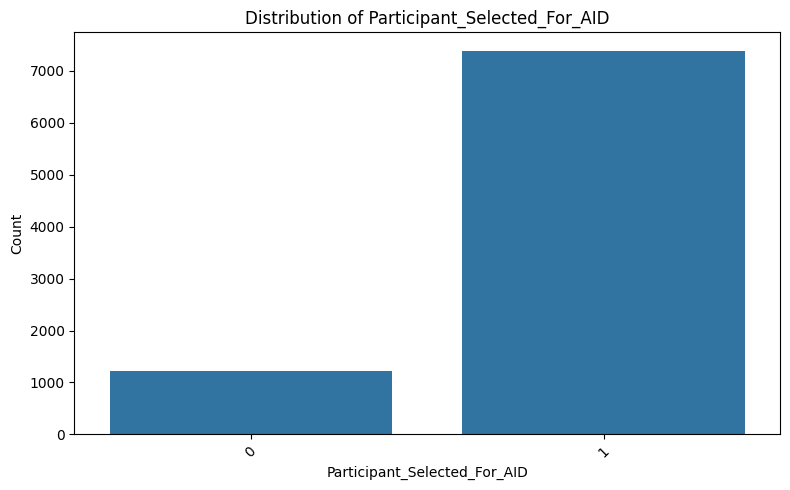

2025-10-30 04:52:16,448 - INFO - Plotting distribution for target: Aid_Type_Recomended


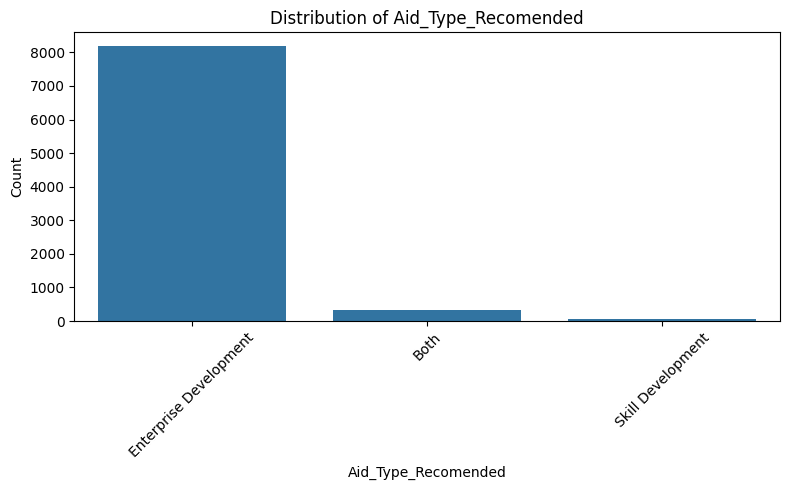

2025-10-30 04:52:16,587 - INFO - Calculating and plotting correlations for Participant_Selected_For_AID (Top 10)
2025-10-30 04:52:16,593 - INFO - Top 10 features correlated with Participant_Selected_For_AID: ['Loans_Running_Yes', 'Loans_Num', 'has_Savings', 'Loans_Outstanding', 'debt_to_income', 'cash_need_score', 'Income_Monthly_per_head', 'income_pc', 'expenditure_pc', 'health_need_score_softmax']


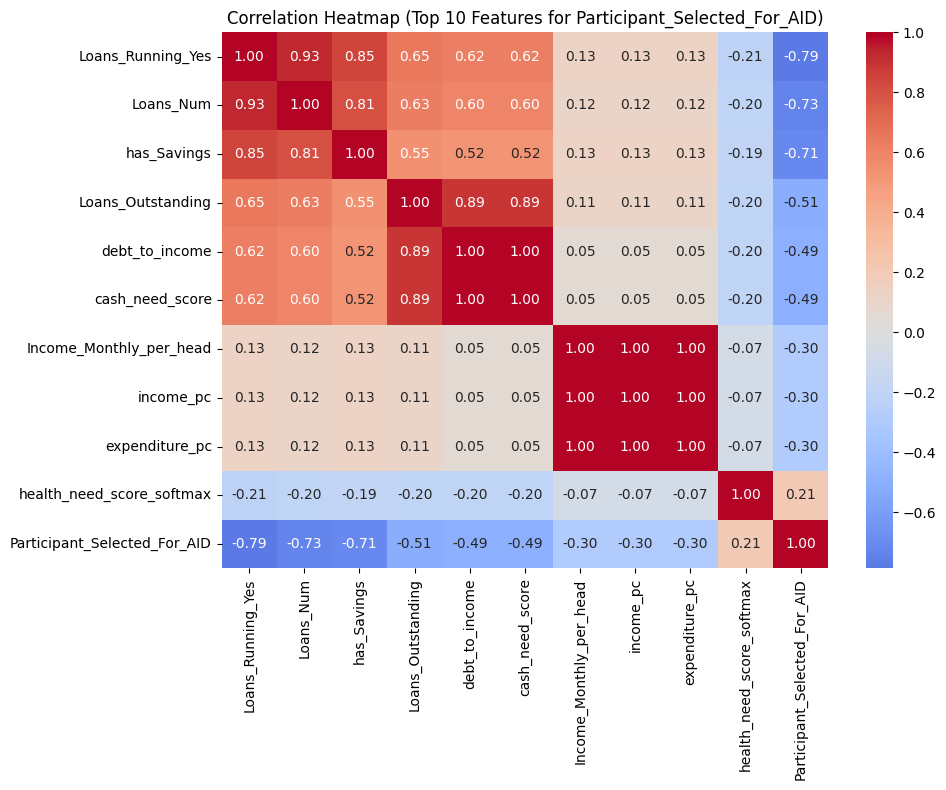

2025-10-30 04:52:16,983 - INFO - Calculating and plotting correlations for Aid_Type_Recomended (Top 10)
2025-10-30 04:52:16,985 - ERROR - Target column 'Aid_Type_Recomended' not found in numeric columns for correlation.
2025-10-30 04:52:16,986 - INFO - Plotting feature distributions by Participant_Selected_For_AID for features: ['income_pc', 'debt_to_income', 'dependency_ratio', 'productive_asset_index']
2025-10-30 04:52:17,021 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-30 04:52:17,028 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-30 04:52:17,049 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings shou

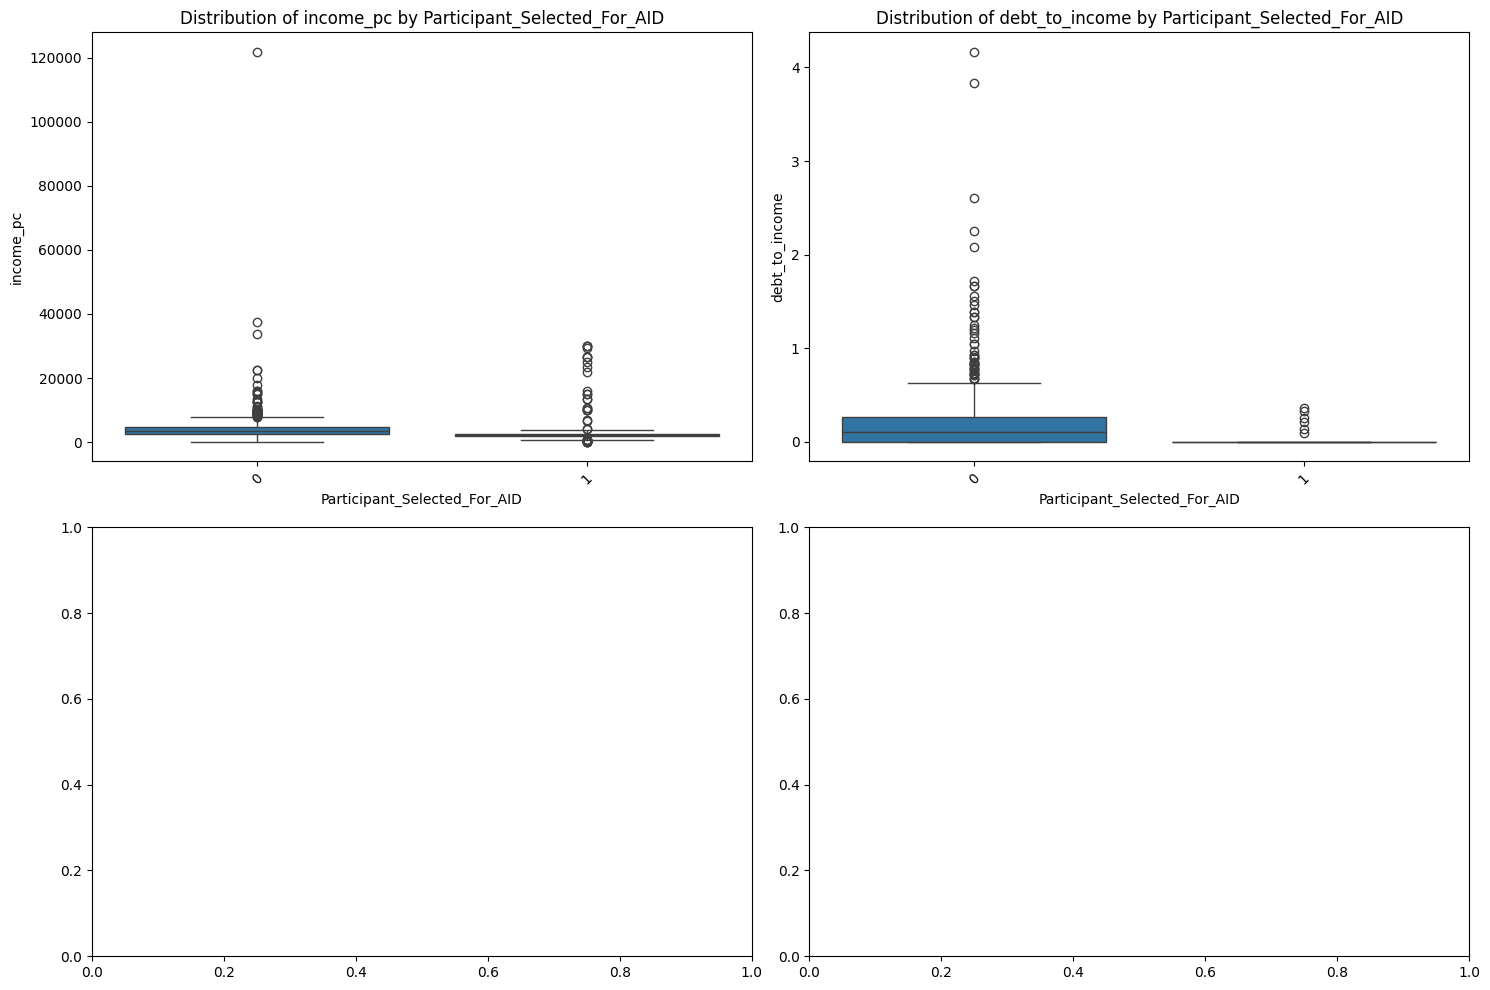

2025-10-30 04:52:17,532 - INFO - Plotting feature distributions by Aid_Type_Recomended for features: ['income_pc', 'debt_to_income', 'dependency_ratio', 'productive_asset_index']
2025-10-30 04:52:17,609 - WARNING - Feature 'dependency_ratio' not found in dataset.
2025-10-30 04:52:17,609 - WARNING - Feature 'productive_asset_index' not found in dataset.


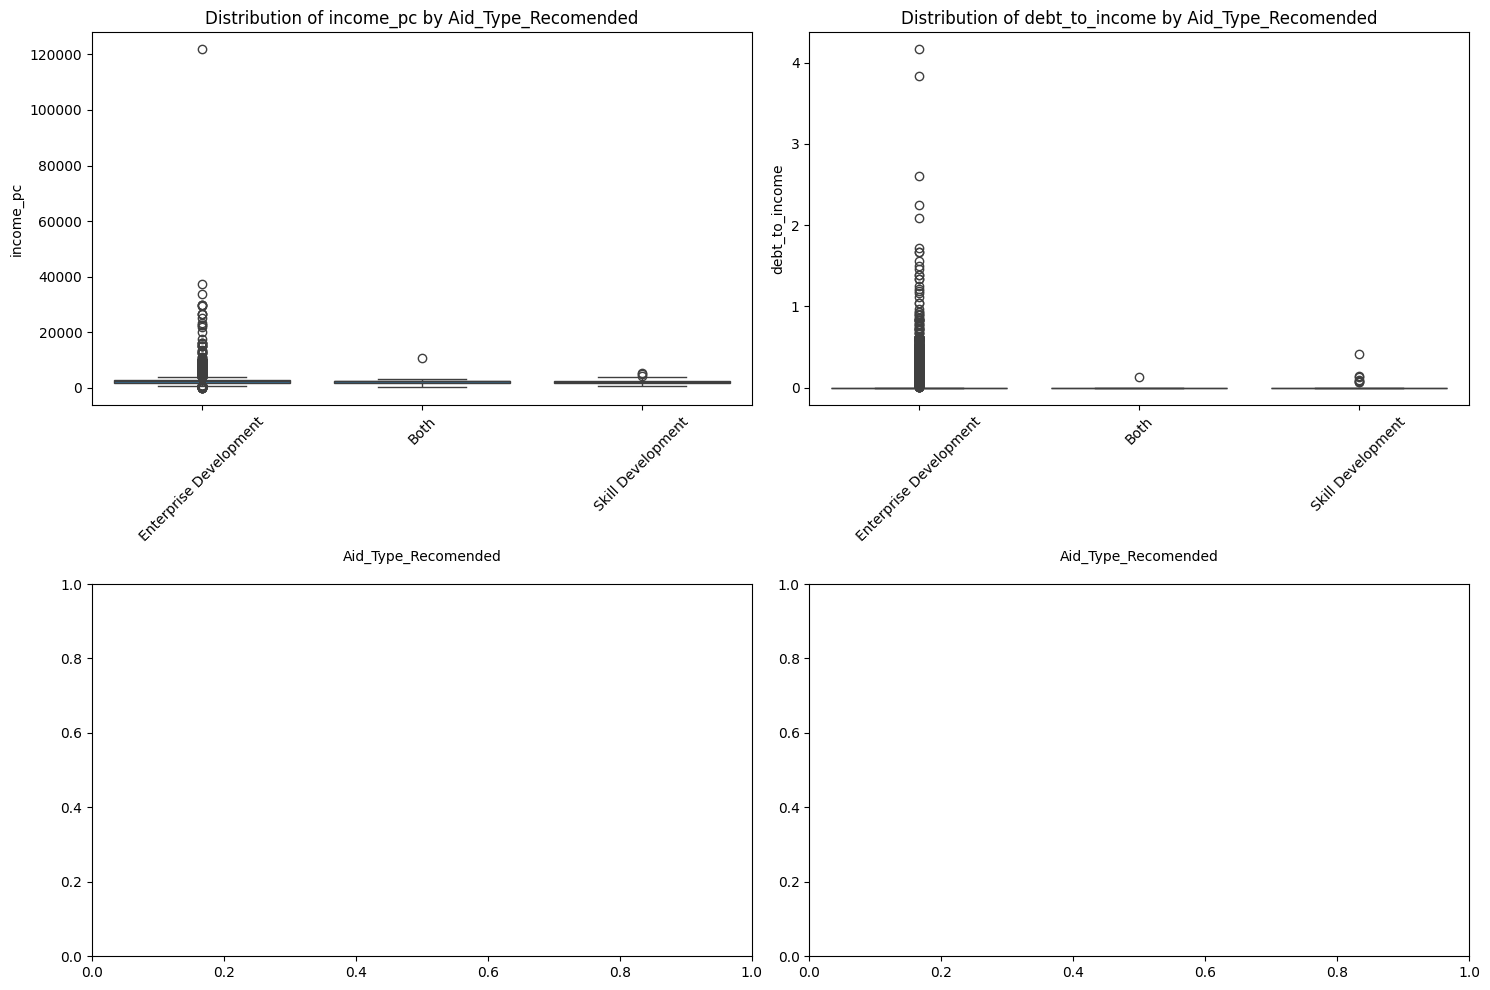

2025-10-30 04:52:18,000 - INFO - EDA Pipeline completed. Plots saved to 'plots/' directory.


In [4]:
from src.exploratory_data_analysis import run_eda

run_eda() # Uses loaded processed data

## 3. Training Task 1: Eligibility Prediction

This step must be completed successfully before Task 2, as it generates the eligibility probabilities needed for Task 2.

In [5]:
from src.model_training_task1 import run_model_training_task1

try:
    task1_models, task1_results, task1_predictions, task1_probabilities, X_val_t1, y1_val_t1, best_model_t1, best_name_t1 = \
        run_model_training_task1(run_id="calibrated_run_1")

    print(f"Best Task 1 Model: {best_name_t1}")
    print(pd.DataFrame(task1_results))

    # Verify probability files were generated
    import os
    proba_files = ['data/task1_train_proba_calibrated_run_1.csv', 'data/task1_val_proba_calibrated_run_1.csv']
    for f in proba_files:
        if os.path.exists(f):
            print(f"Generated: {f}")
        else:
            print(f"ERROR: Missing {f}")

except Exception as e:
    print(f"Error during Task 1 training: {e}")
    import traceback
    traceback.print_exc()

2025-10-30 04:52:18,011 - INFO - Starting Task 1 Model Training Pipeline (Run ID: calibrated_run_1)...
2025-10-30 04:52:18,012 - INFO - Loading processed train data for Task 1...
2025-10-30 04:52:18,019 - INFO - Task 1 train data loaded. Shape: (8600, 10), Target shape: (8600,)
2025-10-30 04:52:18,020 - INFO - Loading processed val data for Task 1...
2025-10-30 04:52:18,024 - INFO - Task 1 val data loaded. Shape: (1229, 10), Target shape: (1229,)
2025-10-30 04:52:18,024 - INFO - Starting training and evaluation of ensemble models for Task 1 with calibration...
2025-10-30 04:52:18,024 - INFO - Training RandomForestClassifier (with calibration)...
2025-10-30 04:52:18,025 - INFO -   Fitting RandomForestClassifier: X_train shape = (8600, 10), y_train shape = (8600,)
2025-10-30 04:52:18,796 - INFO - Evaluating model: RandomForestClassifier
2025-10-30 04:52:18,863 - INFO - Results for RandomForestClassifier:
2025-10-30 04:52:18,864 - INFO -   Accuracy: 0.9829
2025-10-30 04:52:18,864 - INFO -

Best Task 1 Model: RandomForestClassifier
                        Model            Run_ID  Accuracy  Precision   
0      RandomForestClassifier  calibrated_run_1  0.982913   0.988647  \
1  GradientBoostingClassifier  calibrated_run_1  0.986981   0.991477   
2        ExtraTreesClassifier  calibrated_run_1  0.982099   0.986792   
3       LogisticRegression_L1  calibrated_run_1  0.957689   0.957117   
4            VotingClassifier  calibrated_run_1  0.985354   0.989603   

     Recall  F1-Score   ROC-AUC  
0  0.991461  0.990052  0.980249  
1  0.993359  0.992417  0.978645  
2  0.992410  0.989593  0.978493  
3  0.995256  0.975814  0.962835  
4  0.993359  0.991477  0.974747  
Generated: data/task1_train_proba_calibrated_run_1.csv
Generated: data/task1_val_proba_calibrated_run_1.csv


## 4. Training Task 2: Aid Type Recommendation

This step requires the probability files generated by Task 1.

In [6]:
from src.model_training_task2 import run_model_training_task2

try:
    task2_models, task2_results, task2_predictions, X_val_t2, y2_val_t2, best_model_t2, best_name_t2 = \
        run_model_training_task2(run_id="with_eligibility_proba_run_1")

    print(f"Best Task 2 Model: {best_name_t2}")
    print(pd.DataFrame(task2_results))

except Exception as e:
    print(f"Error during Task 2 training: {e}")
    import traceback
    traceback.print_exc()

2025-10-30 04:52:23,144 - INFO - Starting Task 2 Model Training Pipeline (Run ID: with_eligibility_proba_run_1)...
2025-10-30 04:52:23,145 - INFO - Loading processed train data for Task 2...
2025-10-30 04:52:23,154 - INFO - Task 2 train data loaded. Shape: (8600, 11), Target shape: (8600,)
2025-10-30 04:52:23,156 - INFO - Data filtered for valid targets. New shape: (8600, 11), Target shape: (8600,)
2025-10-30 04:52:23,157 - INFO - Loading processed val data for Task 2...
2025-10-30 04:52:23,162 - INFO - Task 2 val data loaded. Shape: (1229, 11), Target shape: (1229,)
2025-10-30 04:52:23,164 - INFO - Data filtered for valid targets. New shape: (1229, 11), Target shape: (1229,)
2025-10-30 04:52:23,164 - INFO - Starting training and evaluation of ensemble models for Task 2...
2025-10-30 04:52:23,168 - INFO - Computed class weights for Task 2: {'Both': 8.406647116324535, 'Enterprise Development': 0.3501058459534278, 'Skill Development': 40.375586854460096}
2025-10-30 04:52:23,168 - INFO - 

Best Task 2 Model: GradientBoostingClassifier
                        Model                        Run_ID  Accuracy   
0      RandomForestClassifier  with_eligibility_proba_run_1  0.644426  \
1  GradientBoostingClassifier  with_eligibility_proba_run_1  0.951180   
2        ExtraTreesClassifier  with_eligibility_proba_run_1  0.528072   
3            VotingClassifier  with_eligibility_proba_run_1  0.644426   

   Precision (Macro)  Recall (Macro)  F1-Score (Macro)  
0           0.333618        0.336903          0.289555  
1           0.317318        0.333048          0.324993  
2           0.331521        0.315716          0.256206  
3           0.333618        0.336903          0.289555  


## 5. Inference

Load the best models and run inference on sample data.

In [8]:
# --- 6. Final Model Evaluation on Test Set ---
print("--- 6. Final Model Evaluation on Test Set ---")

import joblib
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

try:
    # 1. Check if models and data are in memory
    if 'best_model_t1' not in locals() or 'best_model_t2' not in locals():
        print("Loading models... (Assuming training cells were run previously)")
        best_model_t1 = joblib.load(f'models/task1_{best_name_t1}_calibrated_run_1.pkl')
        best_model_t2 = joblib.load(f'models/task2_{best_name_t2}_with_eligibility_proba_run_1.pkl')

    if 'X_test' not in locals() or 'y1_test' not in locals() or 'y2_test' not in locals():
        print("Loading test data...")
        X_test = pd.read_csv('data/processed_X_test.csv')
        y1_test = pd.read_csv('data/processed_y1_test.csv', header=None).squeeze("columns")
        y2_test = pd.read_csv('data/processed_y2_test.csv', header=None).squeeze("columns")
        
        # Filter y2_test for NaNs (as done in model_training_task2)
        valid_mask = y2_test.notna()
        X_test = X_test[valid_mask]
        y1_test = y1_test[valid_mask]
        y2_test = y2_test[valid_mask]


    # --- 2. Evaluate Task 1 (Eligibility) ---
    print("\n--- Task 1 (Eligibility) Evaluation Matrices ---")
    task1_test_pred = best_model_t1.predict(X_test)
    task1_test_proba = best_model_t1.predict_proba(X_test)[:, 1]
    
    print(f"Accuracy: {accuracy_score(y1_test, task1_test_pred):.4f}")
    print(classification_report(y1_test, task1_test_pred, target_names=['Not Eligible (0)', 'Eligible (1)']))

    
    # --- 3. Evaluate Task 2 (Aid Recommendation) ---
    print("\n--- Task 2 (ML Recommendation) Evaluation Matrices ---")
    # Prepare X_test for Task 2 (add probability feature)
    X_test_for_task2 = X_test.copy()
    X_test_for_task2['eligibility_proba'] = task1_test_proba
    
    task2_test_pred = best_model_t2.predict(X_test_for_task2)
    
    print(f"Accuracy: {accuracy_score(y2_test, task2_test_pred):.4f}")
    print(classification_report(y2_test, task2_test_pred))

except NameError as e:
    print(f"Error: Could not find variables from training cells (e.g., 'best_name_t1').")
    print("Please run the training cells (8 and 9) successfully before running this cell.")
    print(f"Details: {e}")
except FileNotFoundError as e:
    print(f"Error: Could not load model or data files. {e}")
except Exception as e:
    print(f"An error occurred during evaluation: {e}")
    import traceback
    traceback.print_exc()

--- 6. Final Model Evaluation on Test Set ---

--- Task 1 (Eligibility) Evaluation Matrices ---
Accuracy: 0.9837
                  precision    recall  f1-score   support

Not Eligible (0)       0.95      0.93      0.94       351
    Eligible (1)       0.99      0.99      0.99      2107

        accuracy                           0.98      2458
       macro avg       0.97      0.96      0.97      2458
    weighted avg       0.98      0.98      0.98      2458


--- Task 2 (ML Recommendation) Evaluation Matrices ---
Accuracy: 0.9508
                        precision    recall  f1-score   support

                  Both       0.25      0.01      0.02        97
Enterprise Development       0.95      1.00      0.97      2340
     Skill Development       0.00      0.00      0.00        21

              accuracy                           0.95      2458
             macro avg       0.40      0.34      0.33      2458
          weighted avg       0.92      0.95      0.93      2458



In [12]:
# --- 5. Full End-to-End Inference Cell (on a Random Real Row) ---

import pandas as pd
import numpy as np
import joblib
import json
import logging
import shap  
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set up logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- 1. Re-implement Feature Engineering Logic ---
# This function is a copy of the logic from your src/feature_engineering.py
def engineer_features_for_inference(df: pd.DataFrame, le_marital: LabelEncoder) -> pd.DataFrame:
    """
    Applies the same feature engineering plan used during training to new raw data.
    """
    logger.info("Applying feature engineering to new data...")
    df_fe = df.copy()
    
    # 3.1 Household structure & vulnerability
    df_fe['hh_size'] = df_fe['Family_Size']
    df_fe['dependents_count'] = df_fe['has_under5'] + df_fe['has_50_plus']
    df_fe['working_age_adults'] = df_fe['has_18_50_Family_member']
    df_fe['dependency_ratio'] = df_fe['dependents_count'] / (df_fe['working_age_adults'] + 1e-8)

    # 3.2 Economic capacity & liquidity
    df_fe['income_total_monthly'] = df_fe['Income_Monthly_per_head'] * df_fe['hh_size']
    df_fe['expenditure_total_monthly'] = df_fe['Income_Monthly_per_head'] * df_fe['hh_size'] # Proxy
    df_fe['income_pc'] = df_fe['Income_Monthly_per_head']
    df_fe['expenditure_pc'] = df_fe['expenditure_total_monthly'] / df_fe['hh_size']
    df_fe['savings_to_expenditure'] = df_fe['Savings_Amt'] / (df_fe['expenditure_total_monthly'] + 1e-8)
    df_fe['debt_to_income'] = df_fe['Loans_Outstanding'] / (df_fe['Total_Income_Annualy'] + 1.0)
    df_fe['debt_to_income'] = df_fe['debt_to_income'].replace([float('inf'), float('-inf')], np.nan)
    df_fe['liquidity_gap'] = (df_fe['expenditure_total_monthly'] - df_fe['income_total_monthly']) / (df_fe['income_total_monthly'] + 1e-8)

    # 3.3 Assets & livelihood readiness
    df_fe['productive_asset_index'] = df_fe['Productive_Asset_Value']

    # 3.4 Health burden & care access
    df_fe['chronic_illness_count'] = df_fe['Chronic_Patient_Num']
    df_fe['disability_in_household'] = df_fe['Disabled_Yes']

    # 5. Encodings (must happen before scores that use it)
    try:
        df_fe['Marrital_Status_Encoded'] = le_marital.transform(df_fe['Marrital_Status'].astype(str))
    except ValueError as e:
        logger.warning(f"Label encoder warning: {e}. Handling unknown labels.")
        known_classes = le_marital.classes_
        df_fe['Marrital_Status_Encoded'] = [cls if cls in known_classes else 'Others' for cls in df_fe['Marrital_Status'].astype(str)]
        try:
             df_fe['Marrital_Status_Encoded'] = le_marital.transform(df_fe['Marrital_Status_Encoded'])
        except:
             df_fe['Marrital_Status_Encoded'] = 0 
    
    # 4. Aid-Type–Specific Scores
    scaler = StandardScaler()
    cash_need_features = ['liquidity_gap', 'debt_to_income']
    asset_readiness_features = ['productive_asset_index']
    health_need_features = ['chronic_illness_count', 'disability_in_household']
    training_suitability_features = ['Marrital_Status_Encoded']
    
    df_fe['cash_need_score'] = scaler.fit_transform(df_fe[cash_need_features].fillna(0)).mean(axis=1)
    df_fe['asset_readiness_score'] = scaler.fit_transform(df_fe[asset_readiness_features].fillna(0)).mean(axis=1)
    df_fe['health_need_score'] = scaler.fit_transform(df_fe[health_need_features].fillna(0)).mean(axis=1)
    df_fe['training_suitability_score'] = scaler.fit_transform(df_fe[training_suitability_features].fillna(0)).mean(axis=1)

    score_cols = ['cash_need_score', 'asset_readiness_score', 'health_need_score', 'training_suitability_score']
    score_df = df_fe[score_cols]
    
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    softmax_vals = softmax(score_df.values)
    for i, col in enumerate(score_cols):
        df_fe[f'{col}_softmax'] = softmax_vals[:, i]

    # 5. Interaction & Missingness
    df_fe['dependency_ratio_x_income_pc'] = df_fe['dependency_ratio'] * df_fe['income_pc']
    df_fe['productive_asset_x_market_access'] = df_fe['productive_asset_index'] * 0
    for col in ['income_pc', 'debt_to_income', 'savings_to_expenditure']:
        if col in df_fe.columns:
            df_fe[f'is_{col}_missing'] = df_fe[col].isna().astype(int)

    logger.info("Feature engineering complete.")
    return df_fe

# --- 2. Helper Function for SHAP ---
def get_top_drivers(shap_values_row, feature_names, top_n=3):
    """Extracts the top N features and their impact from a SHAP values row."""
    df = pd.DataFrame({'feature': feature_names, 'shap_value': shap_values_row})
    df['abs_shap'] = df['shap_value'].abs()
    df = df.sort_values(by='abs_shap', ascending=False).head(top_n)
    drivers = []
    for _, row in df.iterrows():
        drivers.append({
            "feature": row['feature'],
            "contribution": round(row['shap_value'], 4)
        })
    return drivers

# --- 3. Main Inference Function (Updated) ---
def run_full_inference(
    raw_data_df: pd.DataFrame, 
    model_t1, 
    model_t2,
    explainer_t1,
    explainer_t2,
    top_10_features: list, 
    le_marital: LabelEncoder
):
    """
    Orchestrates the full inference pipeline from raw data to JSON.
    """
    
    # 1. Engineer all features
    df_engineered = engineer_features_for_inference(raw_data_df, le_marital)
    
    # 2. Select the Top 10 features
    for col in top_10_features:
        if col not in df_engineered.columns:
            logger.warning(f"Feature '{col}' was not in dataframe. Adding it as 0.")
            df_engineered[col] = 0
            
    X_new = df_engineered[top_10_features].fillna(0)
    
    # --- 3. Task 1: Eligibility Prediction ---
    task1_prob = model_t1.predict_proba(X_new)[:, 1]
    task1_pred = (task1_prob >= 0.5).astype(int)
    
    # --- 4. Task 2: ML Aid Recommendation ---
    X_new_t2 = X_new.copy()
    X_new_t2['eligibility_proba'] = task1_prob
    
    task2_prob_all = model_t2.predict_proba(X_new_t2)
    task2_pred_idx = np.argmax(task2_prob_all, axis=1)
    task2_pred_ml = model_t2.classes_[task2_pred_idx]
    
    # --- 5. SHAP Explanations (in batch) ---
    logger.info("Calculating SHAP values for predictions...")
    shap_values_t1_all = explainer_t1(X_new)
    shap_values_t2_all = explainer_t2(X_new_t2)
    logger.info("SHAP calculation complete.")

    # --- 6. Apply Business Logic & Build JSON ---
    logger.info("Applying final business logic and building JSON...")
    
    HEALTH_NEED_THRESHOLD = df_engineered['health_need_score_softmax'].quantile(0.75) 
    CASH_NEED_THRESHOLD = df_engineered['cash_need_score'].quantile(0.75) 
    
    json_output = []
    
    for i in range(len(df_engineered)):
        health_score = df_engineered.iloc[i]['health_need_score_softmax']
        cash_score = df_engineered.iloc[i]['cash_need_score']
        ml_recommendation = task2_pred_ml[i]
        
        # --- Get Top 3 Drivers for This Row ---
        shap_vals_t1_row = shap_values_t1_all[i, :, 1].values
        top_3_t1 = get_top_drivers(shap_vals_t1_row, X_new.columns)
        
        predicted_class_index_t2 = task2_pred_idx[i]
        shap_vals_t2_row = shap_values_t2_all[i, :, predicted_class_index_t2].values
        top_3_t2 = get_top_drivers(shap_vals_t2_row, X_new_t2.columns)
        
        # --- Apply Business Logic ---
        final_aid = "N/A"
        if health_score > HEALTH_NEED_THRESHOLD:
            final_aid = 'Health Support'
        elif cash_score > CASH_NEED_THRESHOLD:
            final_aid = 'Cash Grant'
        elif ml_recommendation == 'Enterprise Development':
            final_aid = 'Livelihood Asset'
        elif ml_recommendation == 'Skill Development':
            final_aid = 'Training'
        elif ml_recommendation == 'Both':
            final_aid = 'Livelihood Asset AND Training'

        # Build JSON response for this row
        response = {
            "participant_id": raw_data_df.iloc[i].get('Participant_ID', f"index_{i}"),
            "aid_eligibility_prediction": "Eligible" if task1_pred[i] == 1 else "Not Eligible",
            "aid_eligibility_probability": round(task1_prob[i], 4),
            "top_3_eligibility_drivers": top_3_t1,
            "recommended_aid": final_aid,
            "top_3_recommendation_drivers": top_3_t2,
            "internal_ml_recommendation": ml_recommendation
        }
        json_output.append(response)
        
    return json_output

# --- 4. Run Inference ---
try:
    # --- A. Load all resources ONCE ---
    MODEL_T1_PATH = f'models/task1_{best_name_t1}_calibrated_run_1.pkl'
    MODEL_T2_PATH = f'models/task2_{best_name_t2}_with_eligibility_proba_run_1.pkl'
    
    model_task1 = joblib.load(MODEL_T1_PATH)
    model_task2 = joblib.load(MODEL_T2_PATH)
    le_marital = joblib.load('data/label_encoder_marital.pkl')
    
    with open('data/final_features.json', 'r') as f:
        top_10_features = json.load(f)

    # --- B. Create SHAP Explainers ---
    logger.info("Creating SHAP explainers (this may take a moment)...")
    X_train_bg = pd.read_csv('data/processed_X_train.csv')
    X_train_sample = shap.sample(X_train_bg, 50, random_state=42) 

    explainer_t1 = shap.Explainer(model_task1.predict_proba, X_train_sample)
    
    t1_probs_for_bg = model_task1.predict_proba(X_train_sample)[:, 1]
    X_train_sample_t2 = X_train_sample.copy()
    X_train_sample_t2['eligibility_proba'] = t1_probs_for_bg
    
    explainer_t2 = shap.Explainer(model_task2.predict_proba, X_train_sample_t2)
    logger.info("SHAP explainers created successfully.")

    # --- C. Load a Random RAW Row ---
    # We load the *original* CSV to get a *raw* row, which is what 
    # the 'engineer_features_for_inference' function expects.
    logger.info("Loading a random raw row from data/Participant_Selection_Final.csv...")
    full_raw_data = pd.read_csv('data/Participant_Selection_Final.csv')
    
    # Get a random row. Use a different random_state to get a new row each time.
    sample_raw_data = full_raw_data.sample(1) 

    print("\n--- Sample Raw Data for Inference (Random Row) ---")
    print(sample_raw_data.to_string()) # Print full row

    # --- D. Run Pipeline and Get JSON ---
    inference_results = run_full_inference(
        raw_data_df=sample_raw_data,
        model_t1=model_task1,
        model_t2=model_task2,
        explainer_t1=explainer_t1,
        explainer_t2=explainer_t2,
        top_10_features=top_10_features,
        le_marital=le_marital
    )
    
    # --- E. Print Final JSON Output ---
    final_json = json.dumps(inference_results, indent=2)
    print("\n--- Final Inference JSON Output (with Top 3 Drivers) ---")
    print(final_json)

except NameError as e:
    print(f"Error: Make sure the training cells (8 and 9) ran successfully to define 'best_name_t1' and 'best_name_t2'.")
    print(f"Details: {e}")
except FileNotFoundError as e:
    print(f"Error: Could not load a necessary file. {e}")
except Exception as e:
    print(f"An error occurred during inference: {e}")
    import traceback
    traceback.print_exc()

2025-10-30 05:09:43,783 - INFO - Creating SHAP explainers (this may take a moment)...
2025-10-30 05:09:43,800 - INFO - SHAP explainers created successfully.
2025-10-30 05:09:43,800 - INFO - Loading a random raw row from data/Participant_Selection_Final.csv...
2025-10-30 05:09:43,826 - INFO - Applying feature engineering to new data...
2025-10-30 05:09:43,837 - INFO - Feature engineering complete.
2025-10-30 05:09:43,848 - INFO - Calculating SHAP values for predictions...



--- Sample Raw Data for Inference (Random Row) ---
        Sl Participant_ID Participant_Birthdate Marrital_Status  Family_Migrant_Tenure(Years)  Gurdian_Age  Family_Size  Asset_Yes  Productive_Asset_Num  Productive_Asset_Value  Total_Income_Annualy  Income_Monthly_per_head  Chronic_Patient_Num  Disabled_Num  Loans_Num  Loans_Outstanding  has_Savings  Savings_Amt  has_18_50_Family_member  has_50_plus  has_under5  Has_Chronic_Dissease  Loans_Taken_Yes  Loans_Running_Yes  Migrant  Disabled_Yes Participant_Selected_For_AID     Aid_Type_Recomended
4963  4964         P-7097            1988-02-26         Married                           4.0           38            4          1                     3                    9000                108000                   2250.0                    0             0          0                  0            0            0                        1            0           1                     0                0                  0        0             0    

2025-10-30 05:09:44,835 - INFO - SHAP calculation complete.
2025-10-30 05:09:44,835 - INFO - Applying final business logic and building JSON...



--- Final Inference JSON Output (with Top 3 Drivers) ---
[
  {
    "participant_id": "P-7097",
    "aid_eligibility_prediction": "Eligible",
    "aid_eligibility_probability": 0.945,
    "top_3_eligibility_drivers": [
      {
        "feature": "cash_need_score",
        "contribution": -0.052
      },
      {
        "feature": "expenditure_pc",
        "contribution": 0.0418
      },
      {
        "feature": "Income_Monthly_per_head",
        "contribution": 0.041
      }
    ],
    "recommended_aid": "Livelihood Asset",
    "top_3_recommendation_drivers": [
      {
        "feature": "eligibility_proba",
        "contribution": 0.0913
      },
      {
        "feature": "income_pc",
        "contribution": -0.0405
      },
      {
        "feature": "Income_Monthly_per_head",
        "contribution": -0.0354
      }
    ],
    "internal_ml_recommendation": "Enterprise Development"
  }
]


## Result Summary

--- Task 1 Model Comparison (Eligibility) ---


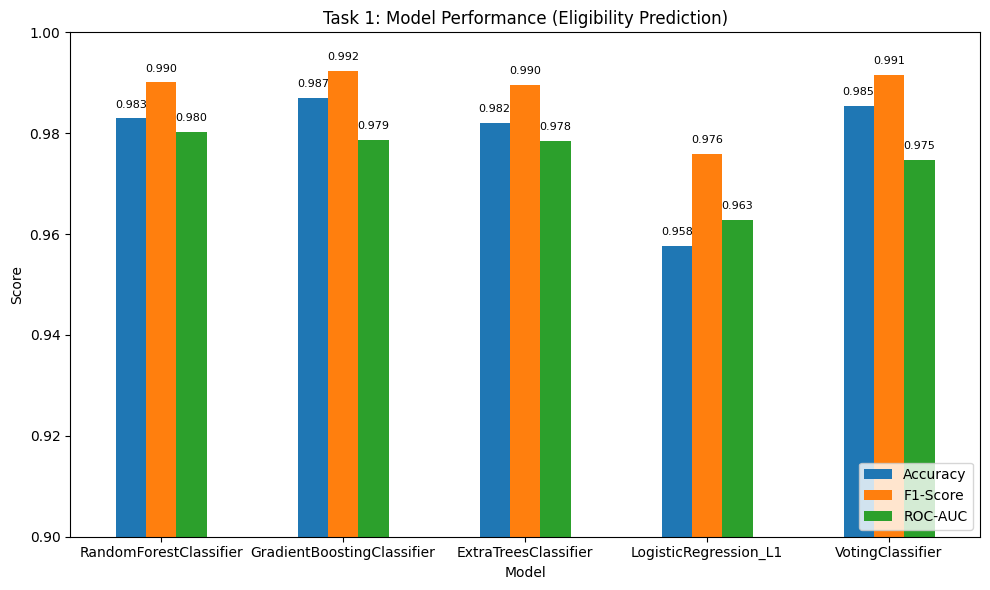


--- Task 2 Model Comparison (Aid Recommendation) ---


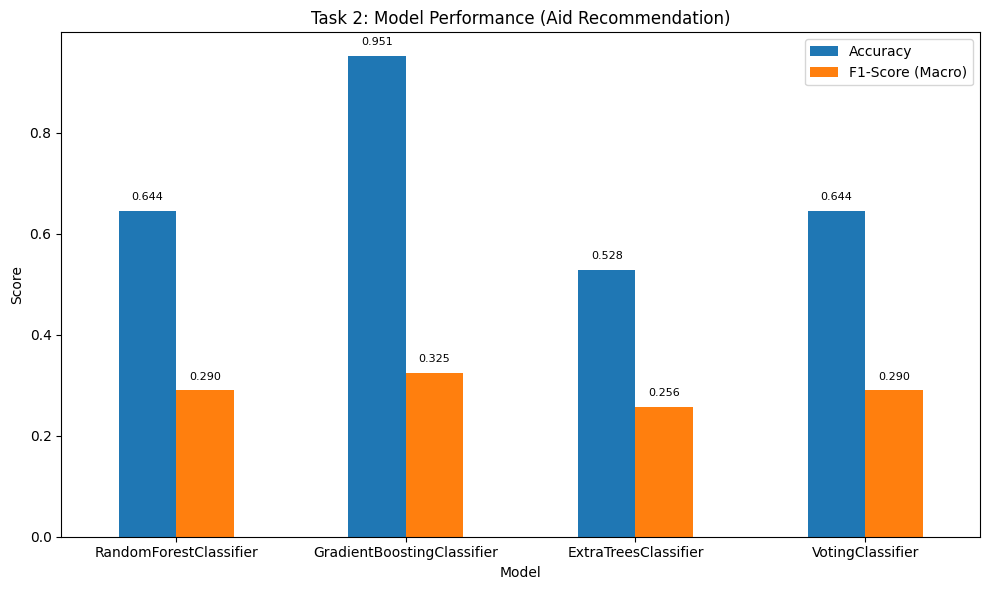

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load the evaluation CSV files ---
try:
    df_task1 = pd.read_csv('results/task1_evaluation_calibrated_run_1.csv')
    df_task2 = pd.read_csv('results/task2_evaluation_with_eligibility_proba_run_1.csv')
except FileNotFoundError:
    print("Error: Make sure 'task1_evaluation_calibrated_run_1.csv' and 'task2_evaluation_with_eligibility_proba_run_1.csv' are in the same directory as the notebook.")
    # Create dummy dataframes to prevent further errors if files are missing
    df_task1 = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'ROC-AUC'])
    df_task2 = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score (Macro)'])

# --- 2. Visualize Task 1 Results (Eligibility Prediction) ---
if not df_task1.empty:
    print("--- Task 1 Model Comparison (Eligibility) ---")
    
    # Set Model as index for easier plotting
    df_task1_plot = df_task1.set_index('Model')
    
    # Plotting Accuracy, F1-Score, and ROC-AUC
    ax1 = df_task1_plot[['Accuracy', 'F1-Score', 'ROC-AUC']].plot(
        kind='bar', 
        figsize=(10, 6), 
        title='Task 1: Model Performance (Eligibility Prediction)',
        rot=0, # Keep model names horizontal
        ylim=(0.9, 1.0) # Zoom in on the high scores
    )
    
    # Set labels
    ax1.set_ylabel('Score')
    ax1.set_xlabel('Model')
    ax1.legend(loc='lower right')
    
    # Add data labels on top of each bar
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# --- 3. Visualize Task 2 Results (Aid Recommendation) ---
if not df_task2.empty:
    print("\n--- Task 2 Model Comparison (Aid Recommendation) ---")
    
    # Set Model as index for easier plotting
    df_task2_plot = df_task2.set_index('Model')
    
    # Plotting Accuracy and F1-Score (Macro)
    ax2 = df_task2_plot[['Accuracy', 'F1-Score (Macro)']].plot(
        kind='bar', 
        figsize=(10, 6), 
        title='Task 2: Model Performance (Aid Recommendation)',
        rot=0 # Keep model names horizontal
    )
    
    # Set labels
    ax2.set_ylabel('Score')
    ax2.set_xlabel('Model')
    ax2.legend(loc='upper right')
    
    # Add data labels on top of each bar
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    plt.show()